## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [3]:
print("No of train samples:",x_train.shape[0])


No of train samples: 60000


In [4]:
print("No of test samples:",x_test.shape[0])


No of test samples: 10000


### Find dimensions of an image in the dataset

In [5]:
print("Dimension of train samples:",x_train.shape)
print("Dimension of test samples:",x_test.shape)

Dimension of train samples: (60000, 28, 28)
Dimension of test samples: (10000, 28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


print('--- THE DATA ---')
print('x_train shape:', x_train.shape)  ## not RGB so dimension is 1 not 3 here
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
y_train[0:5,]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)  ## not RGB so dimension is 1 not 3 here
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle

import warnings
warnings.filterwarnings('ignore')


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [11]:
# Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 17s 278us/step - loss: 0.3770 - acc: 0.8644 - val_loss: 0.2900 - val_acc: 0.8945
Epoch 2/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.2345 - acc: 0.9124 - val_loss: 0.2583 - val_acc: 0.9055
Epoch 3/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.1695 - acc: 0.9365 - val_loss: 0.2793 - val_acc: 0.9069
Epoch 4/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.1187 - acc: 0.9557 - val_loss: 0.2665 - val_acc: 0.9129
Epoch 5/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0799 - acc: 0.9709 - val_loss: 0.3031 - val_acc: 0.9104
Epoch 6/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0545 - acc: 0.9800 - val_loss: 0.3200 - val_acc: 0.9170
Epoch 7/1

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [12]:
# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# adding Maxpool layer
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

# Dropout layer
model2.add(keras.layers.Dropout(0.5))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.4266 - acc: 0.8451 - val_loss: 0.3143 - val_acc: 0.8879
Epoch 2/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2867 - acc: 0.8936 - val_loss: 0.2794 - val_acc: 0.8940
Epoch 3/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.2426 - acc: 0.9108 - val_loss: 0.2369 - val_acc: 0.9137
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.2142 - acc: 0.9201 - val_loss: 0.2294 - val_acc: 0.9135
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.1925 - acc: 0.9269 - val_loss: 0.2281 - val_acc: 0.9189
Epoch 6/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.1750 - acc: 0.9343 - val_loss: 0.2146 - val_acc: 0.9261

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

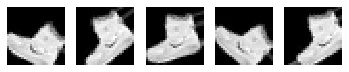

In [14]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [15]:
epochs=10
# Prepare the generator
model2.fit_generator(datagen.flow(x_train, y_train, batch_size=100), steps_per_epoch=len(x_train) / 100, epochs=epochs)

Epoch 1/10
600/600 [==============================] - 14s 23ms/step - loss: 0.8451 - acc: 0.6923
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.6180 - acc: 0.7697
Epoch 3/10
600/600 [==============================] - 14s 23ms/step - loss: 0.5590 - acc: 0.7924
Epoch 4/10
600/600 [==============================] - 14s 24ms/step - loss: 0.5240 - acc: 0.8057
Epoch 5/10
600/600 [==============================] - 14s 23ms/step - loss: 0.4954 - acc: 0.8140
Epoch 6/10
600/600 [==============================] - 14s 23ms/step - loss: 0.4778 - acc: 0.8230
Epoch 7/10
600/600 [==============================] - 14s 23ms/step - loss: 0.4611 - acc: 0.8285
Epoch 8/10
600/600 [==============================] - 14s 23ms/step - loss: 0.4478 - acc: 0.8329
Epoch 9/10
600/600 [==============================] - 14s 23ms/step - loss: 0.4291 - acc: 0.8403
Epoch 10/10
600/600 [==============================] - 14s 23ms/step - loss: 0.4229 - acc: 0.8415


###  Report the final train and validation accuracy

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

results = model2.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

10000/10000 [==============================] - 0s 27us/step
test loss, test acc: [0.2828197732448578, 0.9011]


In [19]:
results = model2.evaluate(x_train, y_train, batch_size=128)
print('test loss, test acc:', results)

60000/60000 [==============================] - 1s 22us/step
test loss, test acc: [0.21686342313289642, 0.9203166666666667]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator


### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10


In [22]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [23]:
print("Dimension of train samples:",x_train.shape)
print("Dimension of test samples:",x_test.shape)

Dimension of train samples: (50000, 32, 32, 3)
Dimension of test samples: (10000, 32, 32, 3)


In [28]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)  ## not RGB so dimension is 1 not 3 here
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

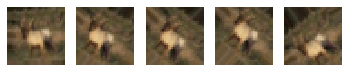

In [42]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[3:4], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

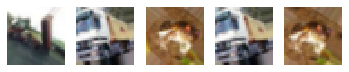

In [45]:
## viewing it from different angle
gen = datagen.flow(x_train[0:3], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()